**Biomass HHV Prediction from Proximate Analysis using Genetic  Symbolic Programming (GP) Modeling**

First read the "HHV_Biomass_Prox.csv" file into "df" (Data Frame) and Plot the Data to watch the Trends (Linear/Non-Linear)

                 Biomass      FC     VM   ASH     HHV Ref.
0          Ailanthus wood  24.80  73.50  1.70  19.000  [1]
1            Akhrot shell  18.78  79.98  1.20  20.008  [2]
2  Alabama Oak wood waste  21.90  74.70  3.30  19.228  [3]
3          Alfalfa pellet  14.77  74.35  9.96  17.840  [4]
4      Alfalfa seed straw  20.15  72.60  7.25  18.450  [5]


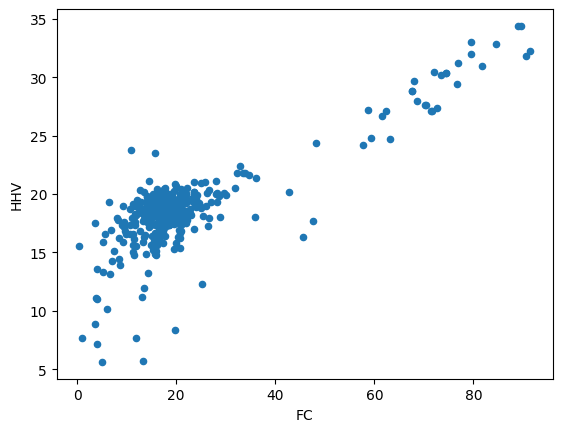

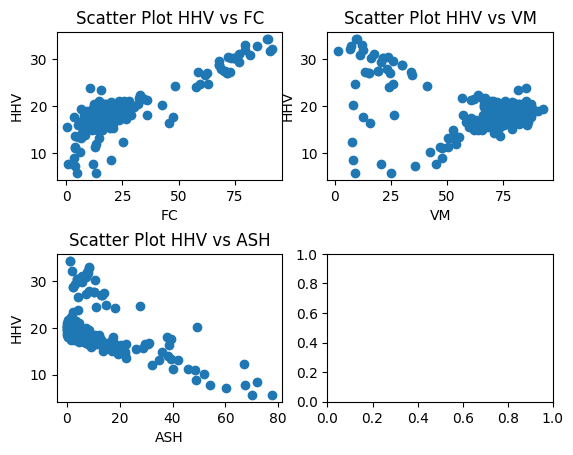

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/Colab Notebooks/data/HHV_Biomass_Prox.csv'
#df = pd.read_csv(file_path)

df = pd.read_csv('HHV_Biomass_Prox.csv')
print(df.head())
df.plot(x='FC', y='HHV', kind='scatter')
fig, axs = plt.subplots(2, 2)   # Creates a 2x2 grid of subplots   OR we can use: plt.subplot(1, 2, 1) ...

FC = df.FC; VM = df.VM; ASH = df.ASH; HHV = df.HHV
axs[0, 0].scatter(FC, HHV)   # Top-left subplotplt.title('Scatter Plot B')
axs[0, 0].set_title('Scatter Plot HHV vs FC'); axs[0, 0].set_xlabel('FC'); axs[0, 0].set_ylabel('HHV')

axs[0, 1].scatter(VM, HHV)   # Top-right subplot
axs[0, 1].set_title('Scatter Plot HHV vs VM'); axs[0, 1].set_xlabel('VM'); axs[0, 1].set_ylabel('HHV')

axs[1, 0].scatter(ASH, HHV)  # Bottom-left subplot
axs[1, 0].set_title('Scatter Plot HHV vs ASH'); axs[1, 0].set_xlabel('ASH'); axs[1, 0].set_ylabel('HHV')

plt.subplots_adjust(hspace=0.5) # Adjust vertical spacing
plt.show()

**Data Preprocessing:** Data Transformation and Splitting for Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values in the required columns before splitting the data
df_cleaned = df[['FC', 'VM', 'ASH', 'HHV']].dropna()

# Define features (X) and target (y)
X = df_cleaned[['FC', 'VM', 'ASH']]
y = df_cleaned['HHV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now **evolve the Genetic Programming (GP) Models** using the GP Learner from the gplearn Library and print the GP Symbolic Expresion (in tree from) in readable math equation form

In [ ]:
!pip install gplearn

from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sympy as sp

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps

# Create a SymbolicRegressor model
# You can adjust parameters like population_size, generations, etc.
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, random_state=42,
                           verbose=1)

# Fit the model
est_gp.fit(X_train, y_train)

# Print the evolved program (the formula)
print("Evolved Program:\n", est_gp._program)

# Make predictions
y_pred_sr = est_gp.predict(X_test)

# Evaluate the model
mse_sr = mean_squared_error(y_test, y_pred_sr)
r2_sr = r2_score(y_test, y_pred_sr)

print(f'Symbolic Regression Mean Squared Error: {mse_sr}')
print(f'Symbolic Regression R-squared: {r2_sr}')
#sp.sympify('add(sub(mul(0.821, mul(add(X1, X0), 0.223)), div(div(div(sub(X0, 0.008), -0.825), 0.551), sub(mul(X1, 0.223), div(div(div(sub(X0, 0.008), -0.825), 0.551), sub(div(X0, add(div(X0, X1), add(div(X0, X1), mul(X1, 0.298)))), 0.253))))), div(X0, sub(div(X0, mul(0.821, mul(add(X1, X0), 0.223))), mul(-0.250, X1))))')

# To visualize the tree structure, you can use graphviz
# You might need to install graphviz system-wide or in your environment
# !pip install graphviz
# import graphviz

# dot_data = est_gp._program.export_graphviz()
# graph = graphviz.Source(dot_data)
# graph.render("symbolic_regression_tree", view=True) # This will save and open the tree visualization

# To print the symbolic equation in Readable Math Equation form
print("Symbolic Equation in Readable Math Equation form:")

import sympy as sp
from sympy import Add, Mul, Lambda

# Define generic symbols for Lambda functions
x_, y_ = sp.symbols('x_ y_')

# Define symbolic variables used in the GP expression
X0, X1, X2 = sp.symbols('X0 X1 X2')

# Create the locals dictionary for sympify
locals_for_sympify = {
    "add": Add,
    "mul": Mul,
    "sub": Lambda((x_, y_), x_ - y_),
    "div": Lambda((x_, y_), x_ / y_),
    "X0": X0, # Ensure X0 is recognized as a symbol
    "X1": X1,  # Ensure X1 is recognized as a symbol
    "X2": X2  # Ensure X2 is recognized as a symbol
}

est_eqn = str(est_gp._program)
# Convert the string to a sympy expression
sympy_expr = sp.sympify(est_eqn, locals=locals_for_sympify)

new_symbol_name = "FC", "VM", "ASH"
FC, VM, ASH = sp.symbols(new_symbol_name)

new_expr = sympy_expr.subs(X0, FC)
new_expr = new_expr.subs(X1, VM)
new_expr = new_expr.subs(X2, ASH)
# Print the readable math equation
print("HHV = ", new_expr)




/usr/local/lib/python3.12/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.09      3.06436e+17        7          3.07331              N/A      1.53m
   1    13.33      1.97584e+06        7          3.07331              N/A      1.20m
   2     8.96          503.154       17          1.99057              N/A      1.38m
   3    10.90          946.794       17          1.99057              N/A      1.08m
   4     9.15          537.513       19           1.6523              N/A     57.93s
   5     9.84          201.597       27          1.60844              N/A      1.12m
   6    12.71          469.042       19          1.16284              N/A     53.01s
   7    15.01          675.686       27          1.06991              N/A     50.82s
   8    19.42          598.837       21         0.969211              N/A  

**Plot the Parity Plots of the GP Model Predictions fit for all dataset**

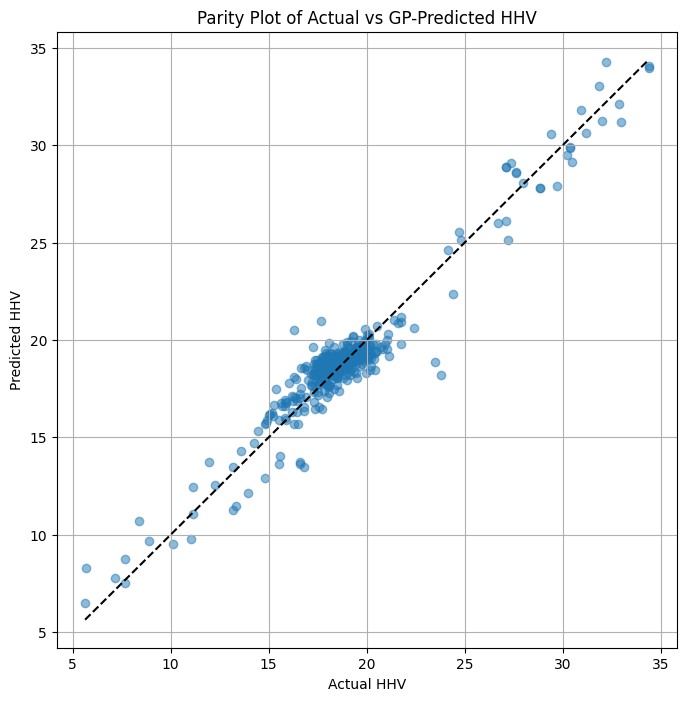

In [ ]:
yPred = est_gp.predict(X)

# Plot parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y, yPred, alpha=0.5)
plt.xlabel('Actual HHV')
plt.ylabel('Predicted HHV')
plt.title('Parity Plot of Actual vs GP-Predicted HHV')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') # Add a diagonal line
plt.grid(True)
plt.show()